In [1]:
# for data
import pandas as pd
import numpy as np
from pandasgui import show
import os
import sys

import datetime

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

PROJ_ROOT = os.path.join(os.pardir)

# Step 1: Import the dataset, explore and ready the data for analysis¶


In [2]:
parent_folder = os.path.dirname(os.getcwd())
aviation_data_path = os.path.join(
    parent_folder, 'data', 'AviationDataEnd2016UP.csv')

data = pd.read_csv(aviation_data_path, encoding='latin-1')

c:\Users\Makara PC\Documents\Bluechip Technologies Asia\ml-aviation-safety


In [3]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20170103X43747,Accident,WPR17LA046,2017-01-03,"Paradise, MT",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,2.0,NaN,NaN,VMC,CRUISE,Preliminary,05/01/2017
1,20161230X55950,Accident,WPR17FA044,2016-12-29,"Dabob, WA",United States,47.823611,-122.790000,NaN,NaN,...,Personal,NaN,4.0,NaN,NaN,NaN,VMC,NaN,Preliminary,05/01/2017
2,20161229X93022,Accident,CEN17LA062,2016-12-27,"Piedmont, MO",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Preliminary,03/01/2017
3,20161227X80237,Accident,CEN17LA061,2016-12-27,"Farmington, MO",United States,37.761111,-90.428611,FAM,FARMINGTON RGNL,...,Personal,NaN,NaN,NaN,1.0,1.0,VMC,TAKEOFF,Preliminary,29/12/2016
4,20161226X80840,Accident,WPR17FA041,2016-12-26,"Fresno, CA",United States,36.844444,-119.870834,E79,Sierra Sky Park,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,05/01/2017


In [4]:
data['Number.of.Engines'].value_counts()

Number.of.Engines
1.0     63082
2.0     10057
0.0      1143
3.0       477
4.0       415
18.0        1
Name: count, dtype: int64

In [5]:
data.shape

(79293, 31)

## Explore values of the columns


In [6]:
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
# create a sub dataframe with the selected columns needed for analysis

df = data[['Event.Date', 'Location',  'Injury.Severity',  'Aircraft.Damage', 'Make', 'Model',
           'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
           'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
           'Weather.Condition', 'Broad.Phase.of.Flight']]

In [8]:
# rename the columns by remvoing the space and capital letters

df.columns = ['event_date', 'location', 'injury_severity',
              'aircraft_damage', 'make', 'model',
              'amateur_build', 'number_of_engines', 'engine_type',
              'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',
              'total_uninjured', 'weather_conditions', 'phase_of_flight'
              ]

In [9]:
df.shape

(79293, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79293 entries, 0 to 79292
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_date              79293 non-null  object 
 1   location                79215 non-null  object 
 2   injury_severity         79293 non-null  object 
 3   aircraft_damage         76883 non-null  object 
 4   make                    79204 non-null  object 
 5   model                   79175 non-null  object 
 6   amateur_build           78721 non-null  object 
 7   number_of_engines       75175 non-null  float64
 8   engine_type             75913 non-null  object 
 9   total_fatal_injuries    55984 non-null  float64
 10  total_serious_injuries  53742 non-null  float64
 11  total_minor_injuries    54833 non-null  float64
 12  total_uninjured         66949 non-null  float64
 13  weather_conditions      77136 non-null  object 
 14  phase_of_flight         73239 non-null

In [11]:
# statistics on numerical data
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,75175.000000,55984.000000,53742.000000,54833.000000,66949.000000
mean,1.148055,0.814679,0.317703,0.502581,5.790886
std,0.453847,6.233700,1.372924,2.781994,29.223016
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,2.000000
max,18.000000,349.000000,111.000000,380.000000,699.000000


In [12]:
df.isnull().sum()

event_date                    0
location                     78
injury_severity               0
aircraft_damage            2410
make                         89
model                       118
amateur_build               572
number_of_engines          4118
engine_type                3380
total_fatal_injuries      23309
total_serious_injuries    25551
total_minor_injuries      24460
total_uninjured           12344
weather_conditions         2157
phase_of_flight            6054
dtype: int64

## Plotting and data study functions


In [13]:
def plot_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(16, 12))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=10, ax=ax)
        # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_title('Skew: ' + str(round(float(df[var_name].skew()), )))
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(df[var].min(), df[var].max()))
    facet.add_legend()


def plot_categories(df, cat, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()


def plot_correlation_map(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize': 12}
    )


def describe_more(df):
    var = []
    l = []
    t = []
    for x in df:
        var.append(x)
        l.append(len(pd.value_counts(df[x])))
        t.append(df[x].dtypes)
    levels = pd.DataFrame({'Variable': var, 'Levels': l, 'Datatype': t})
    levels.sort_values(by='Levels', inplace=True)
    return levels


def plot_variable_importance(X, y):
    tree = DecisionTreeClassifier(random_state=99)
    tree.fit(X, y)
    plot_model_var_imp(tree, X, y)


def plot_model_var_imp(model, X, y):
    imp = pd.DataFrame(
        model.feature_importances_,
        columns=['Importance'],
        index=X.columns
    )
    imp = imp.sort_values(['Importance'], ascending=True)
    imp[: 10].plot(kind='barh')
    print(model.score(X, y))


def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[
              c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

In [14]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param df: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''


def utils_recognize_type(df, col, max_cat=20):
    if (df[col].dtype == "O") | (df[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

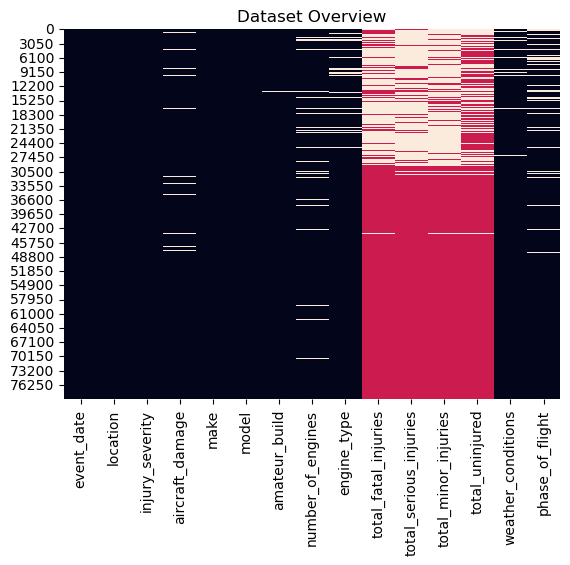

 Categerocial   Numeric   NaN 


In [15]:

dic_cols = {col: utils_recognize_type(
    df, col, max_cat=20) for col in df.columns}
heatmap = df.isnull()
for k, v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()

print("\033[1;37;40m Categerocial ",
      "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

## Data cleaning


In [16]:
# sort by ascending date
df = df.sort_values(by='event_date', ascending=True, na_position='first')

# sort make ascending
df = df.sort_values(by='make', ascending=True, na_position='first')

In [17]:
# counts on unique values for each feature

describe_more(df)

C:\Users\Makara PC\AppData\Local\Temp\ipykernel_9712\2417100190.py:52: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l.append(len(pd.value_counts(df[x])))
C:\Users\Makara PC\AppData\Local\Temp\ipykernel_9712\2417100190.py:52: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l.append(len(pd.value_counts(df[x])))
C:\Users\Makara PC\AppData\Local\Temp\ipykernel_9712\2417100190.py:52: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l.append(len(pd.value_counts(df[x])))
C:\Users\Makara PC\AppData\Local\Temp\ipykernel_9712\2417100190.py:52: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  l.append(len(pd.value_counts(df[x])))
C:\Users\Makara PC\AppDa

,Variable,Levels,Datatype
6,amateur_build,2,object
3,aircraft_damage,3,object
13,weather_conditions,3,object
7,number_of_engines,6,float64
14,phase_of_flight,12,object
8,engine_type,13,object
10,total_serious_injuries,40,float64
11,total_minor_injuries,62,float64
9,total_fatal_injuries,122,float64
2,injury_severity,124,object


In [18]:
# splitting date field in the components

df['Year'] = df['event_date'].apply(
    lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['event_date'].apply(
    lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['event_date'].apply(
    lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

In [19]:
df.head()

,event_date,location,injury_severity,aircraft_damage,make,model,amateur_build,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_conditions,phase_of_flight,Year,Month,Day
77738,1982-06-13,"CAMBRIA, NY",Non-Fatal,Destroyed,NaN,64,No,1.0,Reciprocating,0.0,1.0,0.0,0.0,VMC,CLIMB,1982,6,13
77526,1982-07-01,"MCWHORTER, KY",Non-Fatal,Destroyed,NaN,KR-2,Yes,1.0,Reciprocating,0.0,1.0,1.0,0.0,VMC,CRUISE,1982,7,1
77325,1982-07-16,"FREDERICK, MD",Fatal(1),Destroyed,NaN,WINDWAGON,Yes,1.0,Reciprocating,1.0,0.0,0.0,0.0,VMC,APPROACH,1982,7,16
76825,1982-08-21,"VENTURA, CA",Non-Fatal,Destroyed,NaN,MIDGET MUSTANG,Yes,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,MANEUVERING,1982,8,21
76786,1982-08-24,"SIDNEY, NE",Non-Fatal,Substantial,NaN,SKYBOLT,Yes,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,LANDING,1982,8,24


In [20]:
# clean 'make' column to Caps

df['make'] = df.make.str.upper()

In [21]:
# add a colunm that represents the total number of injuries in the accidents

# target column? split into fatl none fatal?

df['injuries'] = df['total_fatal_injuries'] + \
    df['total_serious_injuries'] + df['total_minor_injuries']

df['pax_onboard'] = (df['total_uninjured']+df['injuries'])

df['fatality_percentage'] = (df['total_fatal_injuries']/df['pax_onboard'])*100

# target good math?
df['survived'] = df['pax_onboard'] - df['total_fatal_injuries']
# change injuries to Total_injuries add fatalities column
# aircraft type and carrier back

# df['accident_classifier'] = logic that returns bool fatal or non-fatal

# fatal vs non fatal accident
# aircraft damage?


# need logic to help with missing values

# knnImpuiter vs mean of pax_onboard????

In [22]:
gui = show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\Makara PC\AppData\Local\Temp\ipykernel_9712\1171758469.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gui = show(df)
C:\Users\Makara PC\AppData\Local\Temp\ipykernel_9712\1171758469.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gui = show(df)
C:\Users\Makara PC\AppData\Local\Temp\ipykernel_9712\1171758469.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\User

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\ipykernel\eventloops.py:128: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\ipykernel\eventloops.py:128: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\ipykernel\eventloops.py:128: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\Users\Makara PC\.conda\en

Refreshed df


In [23]:
# begin to look for unique categories

categories = ['event_date', 'location', 'injury_severity',
              'aircraft_damage', 'make', 'model',
              'amateur_build', 'number_of_engines', 'engine_type',
              'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',
              'total_uninjured', 'weather_conditions'
              ]
for c in categories:
    print(c, df[c].unique())

event_date ['1982-06-13' '1982-07-01' '1982-07-16' ... '2007-08-21' '2010-01-12'
 '1995-05-26']
location ['CAMBRIA, NY' 'MCWHORTER, KY' 'FREDERICK, MD' ... 'Fawcett Lake, Canada'
 'Covington, NY' 'Manatee, FL']
injury_severity ['Non-Fatal' 'Fatal(1)' 'Unavailable' 'Incident' 'Fatal(3)' 'Fatal(8)'
 'Fatal(2)' 'Fatal(17)' 'Fatal(5)' 'Fatal(11)' 'Fatal(4)' 'Fatal(19)'
 'Fatal(6)' 'Fatal(15)' 'Fatal(7)' 'Fatal(113)' 'Fatal(66)' 'Fatal(224)'
 'Fatal(228)' 'Fatal(157)' 'Fatal(152)' 'Fatal(162)' 'Fatal(103)'
 'Fatal(150)' 'Fatal(68)' 'Fatal(58)' 'Fatal(16)' 'Fatal(43)' 'Fatal(10)'
 'Fatal(87)' 'Fatal(124)' 'Fatal(265)' 'Fatal(199)' 'Fatal(30)'
 'Fatal(169)' 'Fatal(143)' 'Fatal(9)' 'Fatal(21)' 'Fatal(13)' 'Fatal(12)'
 'Fatal(18)' 'Fatal(14)' 'Fatal(20)' 'Fatal(25)' 'Fatal(65)' 'Fatal(29)'
 'Fatal(295)' 'Fatal(131)' 'Fatal(90)' 'Fatal(144)' 'Fatal(270)'
 'Fatal(158)' 'Fatal(73)' 'Fatal(153)' 'Fatal(77)' 'Fatal(47)' 'Fatal(54)'
 'Fatal(127)' 'Fatal(72)' 'Fatal(62)' 'Fatal(189)' 'Fatal(239)'
 'Fa

In [24]:
# count the number of different values for each category feature

category_values(df, categories)


 event_date
1982-05-16    25
2000-07-08    25
1984-06-30    25
1983-06-05    24
1984-08-25    24
              ..
2010-01-12     1
2010-01-20     1
2010-01-22     1
2010-01-31     1
2017-01-03     1
Name: event_date, Length: 12638, dtype: int64
Nulls:  0

 location
ANCHORAGE, AK         372
MIAMI, FL             185
CHICAGO, IL           169
ALBUQUERQUE, NM       165
HOUSTON, TX           155
                     ... 
JACKSON TWNSHP, NJ      1
JACKSON CENTER, PA      1
JACKSBORO, TN           1
JACKS CREEK, TN         1
sleetmute, AK           1
Name: location, Length: 25264, dtype: int64
Nulls:  78

 injury_severity
Non-Fatal     60025
Fatal(1)       7830
Fatal(2)       4618
Incident       3175
Fatal(3)       1450
              ...  
Fatal(110)        1
Fatal(199)        1
Fatal(189)        1
Fatal(174)        1
Fatal(26)         1
Name: injury_severity, Length: 124, dtype: int64
Nulls:  0

 aircraft_damage
Substantial    57049
Destroyed      17322
Minor           2512
Name: aircraft

In [ ]:
gui = show(df)

## Filling Null values


In [25]:
# filling some Null values

# aircraft_damage, number_of_engines, engine_type use knn!!!

# set missing Locations to unknown
df['location'].fillna('Unknown', inplace=True)

# fixing weather conditions
df['weather_conditions'].fillna('UNK', inplace=True)

In [26]:
# extracting producers and amateurs

producers = [x for x in df['make'][df['amateur_build'] == 'No'].unique()]
amateurs = [x for x in df['make'][df['amateur_build'] == 'Yes'].unique()]

# -----------------------------------------------
# function that fixes the null in amateur.build


def fix_amateur_built(ab, m):
    if type(ab) == str:
        return ab
    else:
        if m in producers:
            return 'No'
        else:
            return 'Yes'
# fix for amateur_build field


am_build = df.apply(lambda x: fix_amateur_built(
    x['amateur_build'], x['make']), axis=1)

df = df.assign(AmateurBuilt=am_build, index=df.index)

# drop old amateur column before saving to new df

In [27]:
# setting 0 engines for balloons
# .loc

df['number_of_engines'][df['number_of_engines'].isnull() & (
    df['make'].str.contains('balloon', case=False))] = 0.0

C:\Users\Makara PC\AppData\Local\Temp\ipykernel_9712\3856627900.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df.isnull().sum()

event_date                    0
location                      0
injury_severity               0
aircraft_damage            2410
make                         89
model                       118
amateur_build               572
number_of_engines          3986
engine_type                3380
total_fatal_injuries      23309
total_serious_injuries    25551
total_minor_injuries      24460
total_uninjured           12344
weather_conditions            0
phase_of_flight            6054
Year                          0
Month                         0
Day                           0
injuries                  29557
pax_onboard               29671
fatality_percentage       29698
survived                  29671
AmateurBuilt                  0
index                         0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79293 entries, 77738 to 12323
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_date              79293 non-null  object 
 1   location                79293 non-null  object 
 2   injury_severity         79293 non-null  object 
 3   aircraft_damage         76883 non-null  object 
 4   make                    79204 non-null  object 
 5   model                   79175 non-null  object 
 6   amateur_build           78721 non-null  object 
 7   number_of_engines       75307 non-null  float64
 8   engine_type             75913 non-null  object 
 9   total_fatal_injuries    55984 non-null  float64
 10  total_serious_injuries  53742 non-null  float64
 11  total_minor_injuries    54833 non-null  float64
 12  total_uninjured         66949 non-null  float64
 13  weather_conditions      79293 non-null  object 
 14  phase_of_flight         73239 non-null 

## Change the non-numeric data to numeric data


In [30]:
deepCopy = df.copy()

In [31]:
# Encoders require their input to be uniformly strings or numbers.

# deepCopy['AmateurBuilt'] = deepCopy.AmateurBuilt.map(dict(yes=1, no=0))

deepCopy[['make', 'model', 'AmateurBuilt',
          'engine_type', 'number_of_engines', 'weather_conditions']] = deepCopy[['make', 'model', 'AmateurBuilt',
                                                                                 'engine_type', 'number_of_engines', 'weather_conditions']].astype(str)

In [32]:

# Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# label vs hot_encoder???

# Encode make column
deepCopy.iloc[:, 4] = labelencoder.fit_transform(deepCopy.iloc[:, 4].values)


# Encode model
deepCopy.iloc[:, 5] = labelencoder.fit_transform(deepCopy.iloc[:, 5].values)

# Encode amateur_build
deepCopy.iloc[:, 17] = labelencoder.fit_transform(deepCopy.iloc[:, 17].values)

# Encode engine_type
deepCopy.iloc[:, 8] = labelencoder.fit_transform(deepCopy.iloc[:, 8].values)

# Encode weather_conditions
# deepCopy.iloc[:,13]=labelencoder.fit_transform(deepCopy.iloc[:,13].values)


# Print the NEW unique values in the columns
# print(titanic['sex'].unique())

In [33]:
gui = show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


ValueError: cannot insert level_0, already exists

## Testing imputing missing data


In [34]:
# testing KNNImputer on number_of_engines and aircraft damage(make unique feature?)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)


# X = deepCopy.columns(['make','model','amateur_build','engine_type','number_of_engines'])

In [35]:
test = deepCopy[['make', 'model', 'engine_type', 'number_of_engines']]

In [36]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(test, test_size=0.2, random_state=5)

In [37]:
test

,make,model,engine_type,number_of_engines
26445,3907,6852,5,1.0
474,458,5298,13,0.0
40005,1926,5094,5,1.0
52972,4411,10275,5,1.0
17212,2104,4170,5,1.0
...,...,...,...,...
41318,1105,191,5,1.0
27988,2989,10177,5,1.0
17221,1105,626,5,1.0
62912,1105,162,5,1.0


In [38]:
deepCopy.head()

,event_date,location,injury_severity,aircraft_damage,make,model,amateur_build,number_of_engines,engine_type,total_fatal_injuries,...,phase_of_flight,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived,AmateurBuilt,index
77738,1982-06-13,"CAMBRIA, NY",Non-Fatal,Destroyed,6707,1300,No,1.0,5,0.0,...,CLIMB,1982,6,12,1.0,1.0,0.0,1.0,No,77738
77526,1982-07-01,"MCWHORTER, KY",Non-Fatal,Destroyed,6707,6357,Yes,1.0,5,0.0,...,CRUISE,1982,7,0,2.0,2.0,0.0,2.0,Yes,77526
77325,1982-07-16,"FREDERICK, MD",Fatal(1),Destroyed,6707,11073,Yes,1.0,5,1.0,...,APPROACH,1982,7,15,1.0,1.0,100.0,0.0,Yes,77325
76825,1982-08-21,"VENTURA, CA",Non-Fatal,Destroyed,6707,7058,Yes,1.0,5,0.0,...,MANEUVERING,1982,8,20,0.0,1.0,0.0,1.0,Yes,76825
76786,1982-08-24,"SIDNEY, NE",Non-Fatal,Substantial,6707,9656,Yes,1.0,5,0.0,...,LANDING,1982,8,23,0.0,1.0,0.0,1.0,Yes,76786


In [39]:
imputer.fit(train)

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



KNNImputer(n_neighbors=1)

In [40]:
imputer.transform(train)

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



array([[1.105e+03, 6.060e+02, 5.000e+00, 1.000e+00],
       [4.672e+03, 7.886e+03, 5.000e+00, 1.000e+00],
       [9.200e+01, 9.382e+03, 1.100e+01, 1.000e+00],
       ...,
       [1.105e+03, 1.620e+02, 5.000e+00, 1.000e+00],
       [1.105e+03, 2.970e+02, 5.000e+00, 1.000e+00],
       [1.105e+03, 3.100e+02, 5.000e+00, 1.000e+00]])

In [41]:
%%time

imputer.transform(test)

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



CPU times: total: 1.48 s
Wall time: 3.61 s


array([[3.907e+03, 6.852e+03, 5.000e+00, 1.000e+00],
       [4.580e+02, 5.298e+03, 1.300e+01, 0.000e+00],
       [1.926e+03, 5.094e+03, 5.000e+00, 1.000e+00],
       ...,
       [1.105e+03, 6.260e+02, 5.000e+00, 1.000e+00],
       [1.105e+03, 1.620e+02, 5.000e+00, 1.000e+00],
       [4.672e+03, 7.991e+03, 5.000e+00, 1.000e+00]])

In [42]:
G = pd.DataFrame(imputer.transform(train))

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [43]:
G.isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [44]:
labelencoder.inverse_transform(G[2].astype(int))

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Makara PC\.conda\envs\ml-practice\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



array(['Reciprocating', 'Reciprocating', 'Turbo Shaft', ...,
       'Reciprocating', 'Reciprocating', 'Reciprocating'], dtype=object)

In [45]:
# some visualizations

plot_correlation_map(deepCopy)
# damage type?, number of engines!?

ValueError: could not convert string to float: '1982-06-13'

In [ ]:
# before move to visualozations and ML save/export clean DF with engine_number cleaned

# pichart of make?

# which make has the most accidents?

# label vs hot encoder???

# os path help???